In [1]:
import numpy as np # linear algebra working with arrays
import pandas as pd # csv data handling
import os # file operations

#plotting graph
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo

# Set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)

In [2]:
data_loc='../data1'

In [3]:
data=pd.read_csv(os.path.join(data_loc,'rainfall_in_india_1901-2015.csv'))
data=data.fillna(data.mean())
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
# describing the dataset
print("\n-------Dataset information-------\n")
data.info()
print(data.shape)

print("\n-------Checking for null values-------\n")
print(data.isnull().sum().sort_values(ascending=False))


-------Dataset information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec     

In [5]:
data=data.astype({"SUBDIVISION":'category'})

#state wise average annual flow of rainfall 

data1=data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean()
data2=[]
for i in data1.columns:
    data2.append(
        go.Bar(
            x = data1.index,
            y = data1[i].values,
            name = i))
layout = go.Layout(barmode = 'stack',width=1000, height=900)
go.Figure(data = data2, layout = layout).show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# formatting the data in a way that when the ranifall for the last four months were given, the possible flow of rainfall 
# on next consecutive month will get predicted

# Annual rainfall data for Tamilnadu
monthwise_data=np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 
                                'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT','NOV', 'DEC']].loc[data['SUBDIVISION']=='TAMIL NADU'])

x=None
y=None
for i in range(monthwise_data.shape[1]-4):
    if x is None:
        x = monthwise_data[:, i:i+4]
        y = monthwise_data[:, i+4]
    else:
        x = np.concatenate((x, monthwise_data[:, i:i+4]), axis=0)
        y = np.concatenate((y, monthwise_data[:, i+4]), axis=0)

print(x)
print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=40)


[[ 24.5  39.1  21.7  36. ]
 [ 67.2   9.8  25.1  21.9]
 [ 19.3   7.8   1.7  18.2]
 ...
 [110.7 113.5 127.9 112.3]
 [117.7  98.9 252.2 110.8]
 [ 81.6  98.4 132.6 379.8]]
[ 74.   84.7 128.5 121.9  83.7  39.6  56.6  70.3 117.4  64.7  72.1  64.2
  64.6  57.1  52.4  61.1  77.5  81.8  88.5  59.6  39.5 100.1  30.8  75.4
  85.   53.7  73.7  51.   50.7 165.7  54.2 109.6 105.3  49.6  23.7  74.4
  59.9  54.3  60.  131.5  70.9  61.3 204.4  46.1  38.2  76.4  40.9  72.5
  98.2  54.5  83.   58.7  45.8  77.9 149.4  35.1  81.1 114.7  68.2  60.9
  71.9 114.1  45.1  56.8  40.9  51.8  47.6  46.9  57.   85.4  75.7 151.1
  57.   59.5  80.8  33.8 104.1  55.2  35.1  69.2  87.2  58.8  86.9  21.6
  33.4  62.7  50.5  59.1  53.6  94.9  29.5  58.3  46.6  66.6 139.   34.
  49.2  55.8  74.5  54.7  45.   32.6  19.8 101.1  80.6  65.2  44.9  53.7
  74.8  91.9  33.4  41.9  42.  139.1 112.4  41.8  39.3  58.5  34.9  49.8
  43.6  46.1  34.2  30.8  51.5  70.7  46.7  29.7  37.9  66.4  34.5  72.4
  36.2  49.9  47.3  55.7  48.8

In [7]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping

In [8]:
# The term kernel_initializer is a term for which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.

In [9]:
#our neural network is having four inputs and three hidden layers and one output

#An activation function is a very important feature of an artificial neural network , they basically decide whether the neuron should be activated or not by calculating weighted sum and further adding bias with it. In artificial neural networks, the activation function defines the output of that node given an input or set of inputs.

In [10]:
#configuring the neural network model
model=Sequential()
model.add(Dense(250,input_shape=(4,),kernel_initializer='normal',activation='elu'))
model.add(Dense(250,activation='elu'))
model.add(Dense(250,activation='elu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_logarithmic_error',optimizer='adamax',metrics=['mae'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               1250      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 127,001
Trainable params: 127,001
Non-trainable params: 0
_________________________________________________________________


In [11]:
#

In [12]:
# fitting the data in model
early_stopper=EarlyStopping(patience=8,mode='auto')
model_fit=model.fit(x_train, y_train,batch_size=50,epochs=150,verbose=1,validation_split=0.2,callbacks=[early_stopper])

Epoch 1/150
12/12 [==============================] - 2s 34ms/step - loss: 3.0808 - mae: 74.1474 - val_loss: 0.5513 - val_mae: 52.6936
Epoch 2/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5576 - mae: 53.0153 - val_loss: 0.5431 - val_mae: 53.2943
Epoch 3/150
12/12 [==============================] - 0s 6ms/step - loss: 0.5585 - mae: 52.7321 - val_loss: 0.5550 - val_mae: 54.1205
Epoch 4/150
12/12 [==============================] - 0s 10ms/step - loss: 0.5549 - mae: 52.5393 - val_loss: 0.5392 - val_mae: 53.2006
Epoch 5/150
12/12 [==============================] - 0s 15ms/step - loss: 0.5457 - mae: 52.2034 - val_loss: 0.5266 - val_mae: 52.5046
Epoch 6/150
12/12 [==============================] - 0s 17ms/step - loss: 0.5413 - mae: 52.1245 - val_loss: 0.5180 - val_mae: 52.0398
Epoch 7/150
12/12 [==============================] - 0s 7ms/step - loss: 0.5390 - mae: 52.1334 - val_loss: 0.5126 - val_mae: 51.7446
Epoch 8/150
12/12 [==============================] - 0s 6ms/step 

In [13]:
#The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.
#A loss function is calculated from the output values.
#And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.#

In [14]:
y_pred=model.predict(x_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
#print(x_test)
#print(y_pred)
# for epoch-150 MAE-43.7%


Mean Absolute Error: 43.761508773720784


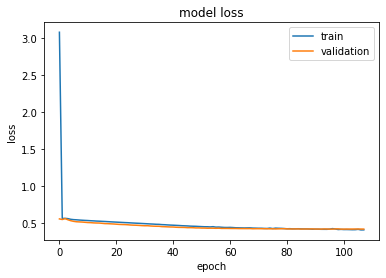

In [15]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

In [17]:
model.save('./model/neuroregress(TN)model')

INFO:tensorflow:Assets written to: ./model/neuroregress(TN)model\assets
